# Как узнать свою аудиторию? Построение различных вариантов кластеризаций и интерпретация результатов.

<b>Цель.</b> На этот раз займемся классической задачкой - сегментация клиентов (в данном случае - банка). Крайне полезная операция, которая позволяет вам лучше познакомится со своей аудиторией, понять, на какие группы она делится и чем они характеризуются.

<b>Описание/Пошаговая инструкция выполнения домашнего задания:</b>

<b>Часть 1. EDA и Preprocessing.</b>
* Скачайте данные по клиентам немецкого банка: https://www.kaggle.com/uciml/german-credit;
* Проведите EDA, чтобы познакомиться с признаками;
* Преобразуйте все признаки в числовые подходящими методами;
* Приведите все данные к одному масштабу (а заодно поясните, почему это необходимая операция при кластеризации).

<b>Часть 2. Моделирование.</b>
* Постройте три варианта кластеризации: k-means, hierarhical и DBSCAN, подберите оптимальное количество кластеров для каждого метода при помощи Elbow method и Silhouette plot;
* Также воспользуйтесь различными вариантами сжатия признакового пространства (PCA, UMAP, tSNE) и визуализируйте результаты кластеризации на двумерной плоскости.

<b>Часть 3. Интерпретация.</b>
* Теперь ваша задача - попытаться проинтерпретировать получившиеся кластеры, начните с простого расчета средних значений признаков для каждого из кластеров, есть ли интересные закономерности?
* Теперь постройте boxplot-ы для каждого признака, сгруппировав значения по кластерам, по каким признакам заметно наибольшее отличие кластеров друг от друга? Можно ли их интерпретировать?

# Часть 1. EDA и Preprocessing.

1. Импортируем основные библиотеки.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2. Считываем данные из CSV-файла. Выводим первые 5 строк, чтобы убедиться, что данные считались с локального файла.

In [2]:
df = pd.read_csv('german_credit_data.csv', index_col = 'Unnamed: 0')
pd.set_option('display.max_columns', None)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


3. Посмотрим на количество записей в файле.

In [3]:
df.shape

(1000, 9)

4. Посмотрим, какого типа эти данные:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 78.1+ KB


Дадим перевод признакам.

| <b>Признак ENG</b>   | <b>Признак RUS</b>    |
| :-:                  | :-:                   |
| Age	               | Возраст               |
| Sex	               | Пол                   |
| Job	               | Работа                |
| Housing	           | Жильё                 |
| Saving accounts	   | Сберегательный счёт   |
| Checking account	   | Расчётный счёт        |
| Credit amount	       | Сумма кредита         |
| Duration	           | Срок действия         |
| Purpose	           | Цель                  |

In [5]:
# Просмотр количества уникальных записей для каждого признака
df.apply(lambda x: x.nunique())

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
dtype: int64

Описание признаков датасета:
* Age (numeric)
* Sex (text: male, female)
* Job (numeric: 0 - неквалифицированный и нерезидент, 1 - неквалифицированный и постоянный, 2 - квалифицированный, 3 - высококвалифицированный специалист)
* Housing (text: own (собственное), rent (арендуемое), or free (бесплатное))
* Saving accounts (text - little, moderate, quite rich, rich)
* Checking account (text - little, moderate, rich)
* Credit amount (numeric, in DM)
* Duration (numeric, in month)
* Purpose (text: car (автомобиль), furniture/equipment (мебель/оборудование), radio/TV (радио/телевизор), domestic appliances (бытовая техника), repairs (ремонт), education (образование), business (бизнес), vacation/others (отпуск/другое)).

5. Уберём из датасета признак "Credit amount", который имеет более 90% уникальных значений.

In [6]:
# Удаление признаков
columns_to_drop = ['Credit amount',]
df = df.drop(columns=columns_to_drop, axis=1)

# Проверим результат
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Duration          1000 non-null   int64 
 7   Purpose           1000 non-null   object
dtypes: int64(3), object(5)
memory usage: 70.3+ KB


6. Построим диаграммы распределения числовых признаков.

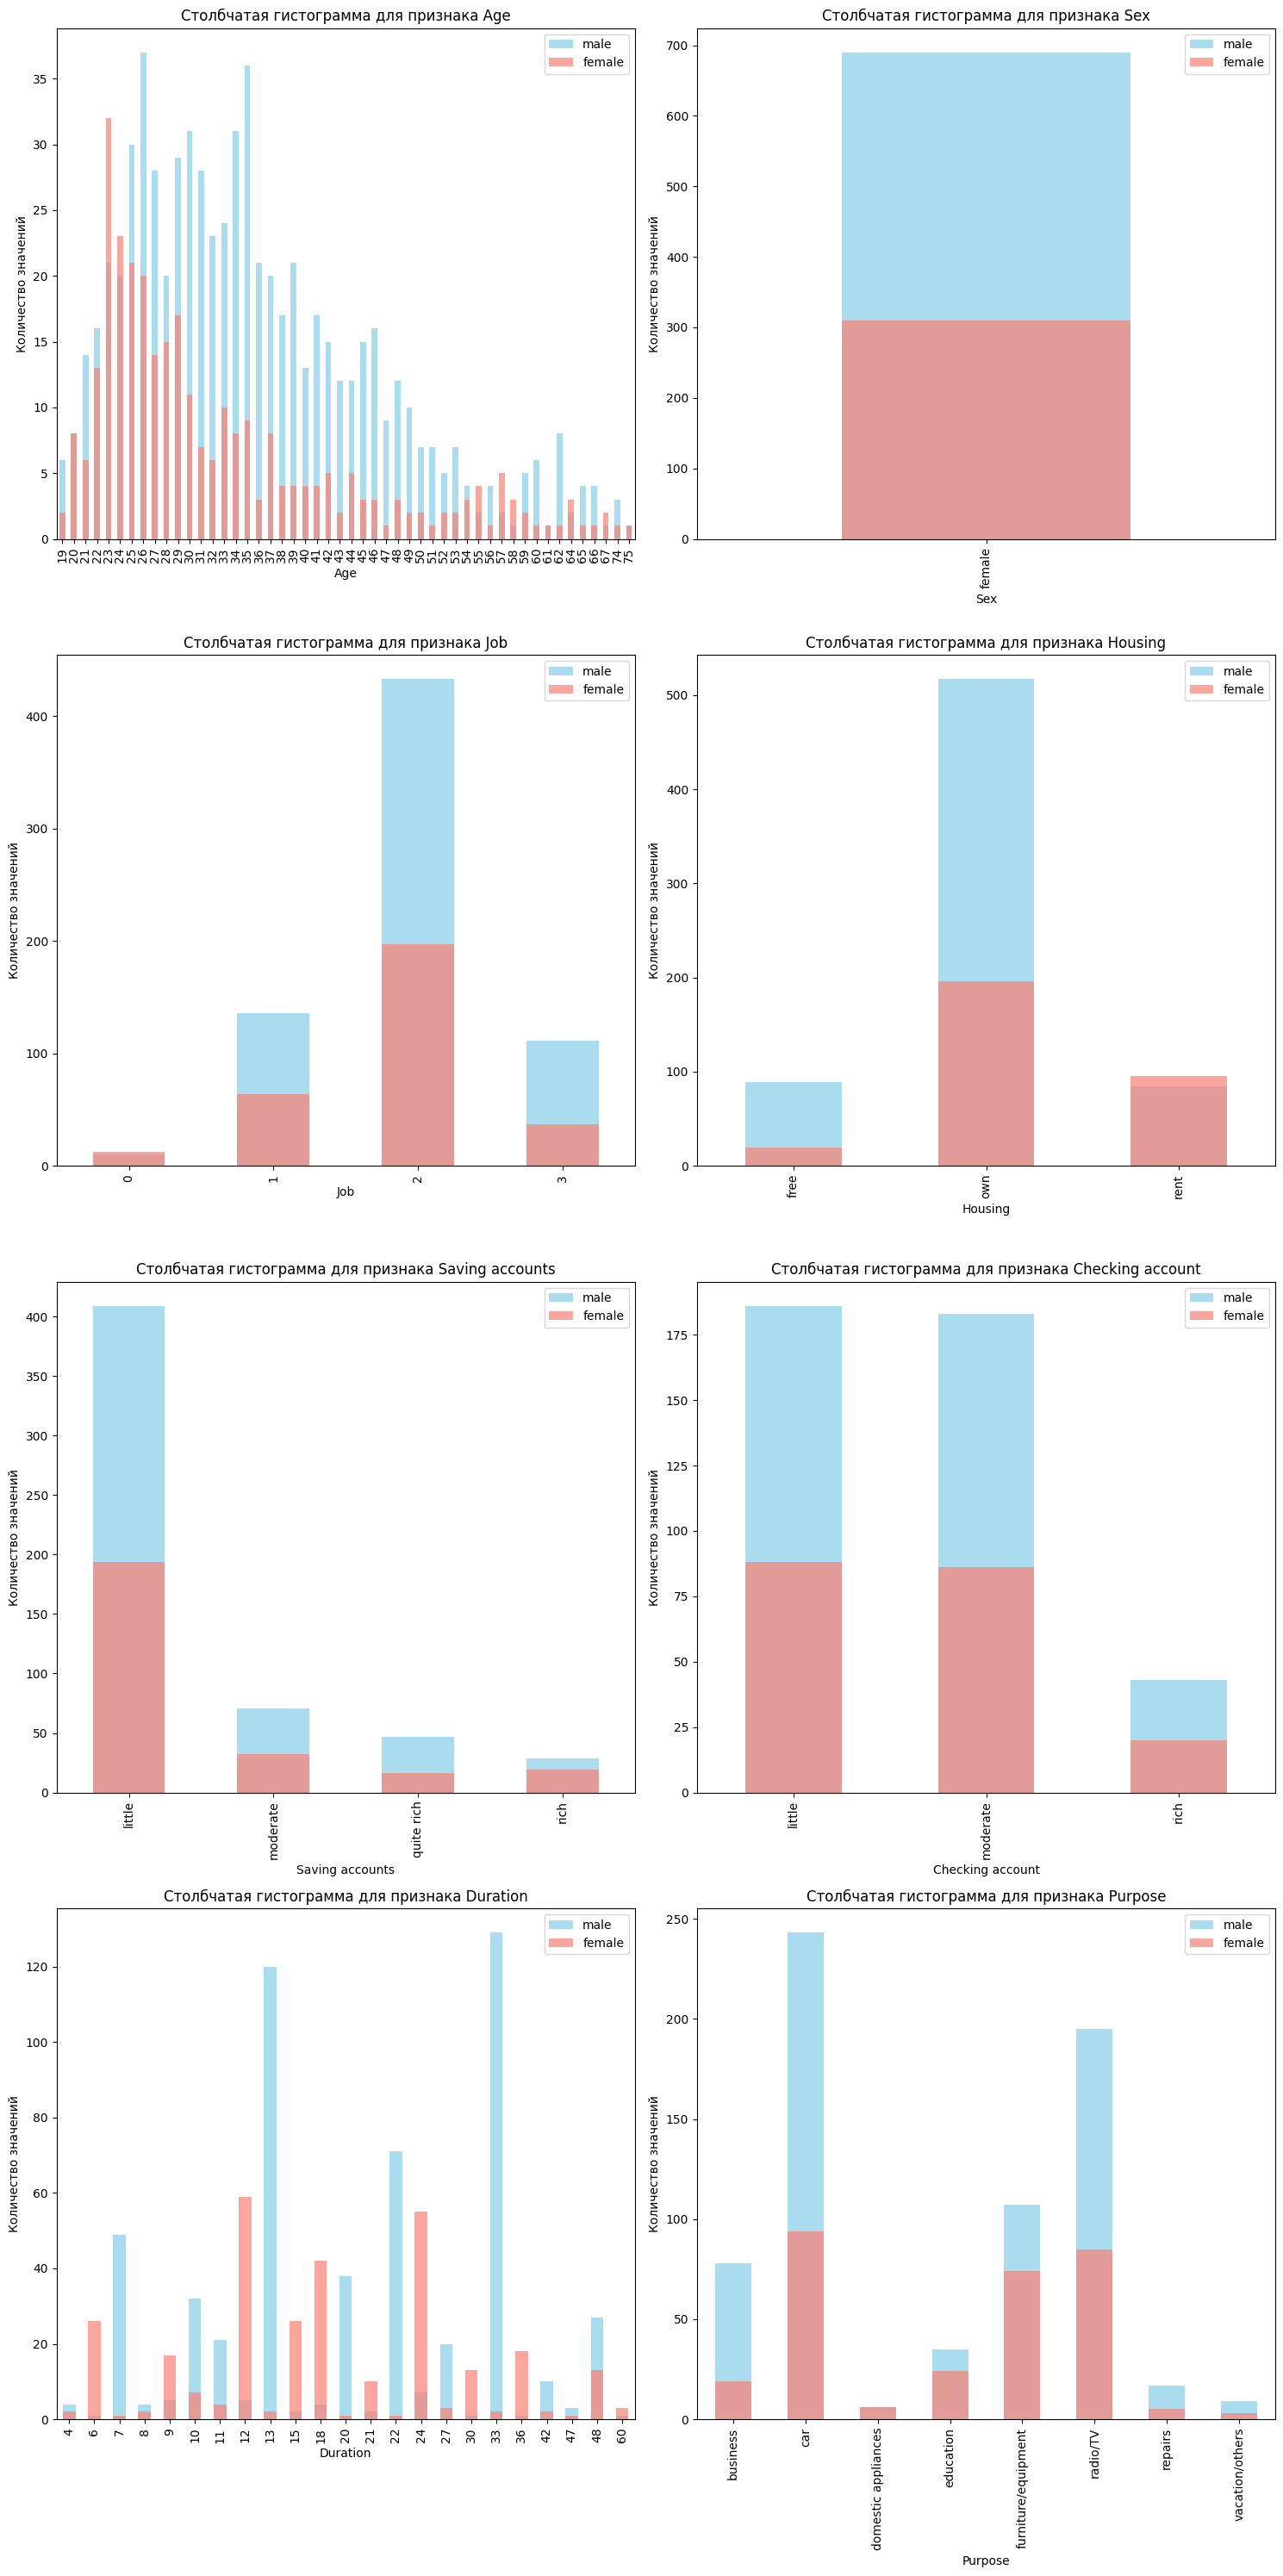

In [7]:
# Получим список всех признаков
features = df.columns

# Создадим цветовую палитру для признака "Sex"
sex_colors = {'male': 'skyblue', 'female': 'salmon'}

# Создадим столбчатые гистограммы для каждого признака
num_cols = 2
num_rows = (len(features) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 30))

for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols
    for sex, color in sex_colors.items():
        df[df['Sex'] == sex][feature].value_counts().sort_index().plot(kind='bar', color=color, ax=axes[row, col], alpha=0.7, label=sex)
    axes[row, col].legend()
    axes[row, col].set_title('Столбчатая гистограмма для признака {}'.format(feature))
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Количество значений')

# Если количество признаков не делится на 2, уберем последний subplot
if len(features) % 2 != 0:
    fig.delaxes(axes.flatten()[-1])

plt.tight_layout()
plt.show()

<b>Исходя из графиков можно сделать следующий вывод:</b> Кредиты наиболее часто берут:
* Age - Женщины в возрасте от 22 до 30 лет, мужчины в возрасте от 22 до 38 лет.
* Job - Лица, являющиеся квалифицированными экспертами.
* Housing - Лица, имеющие собственное жильё.
* Saving accounts - Лица, имеющие малое количество денежных средств на сберегательном счёте.
* Checking account - Лица, имеющие малое или умеренное количество денежных средств на расчётном счёте.

Чаще всего кредит берут на покупку автомобиля и радио/телевизор.
При этом мужчины берут кредиты в 2 раза чаще, чем женщины.


7. Заполним пропущенные значения. Для признака "Saving accounts" укажем наиболее встречающееся значение "litle". Признак "Checking account" удалим, т.к. его заполнение составляет только около ~60% и два значения в нём "litle" и "moderate" распределены равномерно.

In [8]:
# Заполнение значением "little" в столбце "Saving accounts"
df['Saving accounts'].fillna('little', inplace=True)
# Удаление признаков
columns_to_drop = ['Checking account',]
df = df.drop(columns=columns_to_drop, axis=1)

In [9]:
# Проверим результат
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              1000 non-null   int64 
 1   Sex              1000 non-null   object
 2   Job              1000 non-null   int64 
 3   Housing          1000 non-null   object
 4   Saving accounts  1000 non-null   object
 5   Duration         1000 non-null   int64 
 6   Purpose          1000 non-null   object
dtypes: int64(3), object(4)
memory usage: 62.5+ KB


7. Преобразуем категориальные переменные.

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Инициализируем LabelEncoder для признаков 'Sex', 'Housing' и 'Saving accounts'
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Housing'] = label_encoder.fit_transform(df['Housing'])
df['Saving accounts'] = label_encoder.fit_transform(df['Saving accounts'])

# Используем One-Hot Encoding для признака 'Purpose'
onehot_encoder = OneHotEncoder(sparse_output=False)  # Изменение здесь
encoded_values = onehot_encoder.fit_transform(df[['Purpose']])
temp_df = pd.DataFrame(encoded_values, columns=[f'Purpose_{cat}' for cat in onehot_encoder.categories_[0]])
df = pd.concat([df, temp_df], axis=1)
columns_to_drop = ['Purpose',]  # добавляем столбец 'Purpose' для дальнейшего удаления

# Удаляем исходные столбцы из датасета
df.drop(columns=columns_to_drop, inplace=True)

# Устанавливаем опцию для вывода всех столбцов
pd.set_option('display.max_columns', None)
# Выводим первые строки обновленного датасета
df.head()

,Age,Sex,Job,Housing,Saving accounts,Duration,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,1,2,1,0,6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,22,0,2,1,0,48,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,49,1,1,1,0,12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,45,1,2,0,0,42,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,53,1,2,0,0,24,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


8. Посмотрим на распределение данных.

In [11]:
# Получение статистики для числовых признаков
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.0,75.0
Sex,1000.0,0.690,0.462725,0.0,0.0,1.0,1.0,1.0
Job,1000.0,1.904,0.653614,0.0,2.0,2.0,2.0,3.0
Housing,1000.0,1.071,0.531264,0.0,1.0,1.0,1.0,2.0
Saving accounts,1000.0,0.373,0.805307,0.0,0.0,0.0,0.0,3.0
Duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Purpose_business,1000.0,0.097,0.296106,0.0,0.0,0.0,0.0,1.0
Purpose_car,1000.0,0.337,0.472921,0.0,0.0,0.0,1.0,1.0
Purpose_domestic appliances,1000.0,0.012,0.108940,0.0,0.0,0.0,0.0,1.0
Purpose_education,1000.0,0.059,0.235743,0.0,0.0,0.0,0.0,1.0


In [ ]:
# statistics = df.describe().T
# means_df = statistics['mean'].to_dict()
# means_df

9. Приведём все данные к одному масштабу.

Приведение данных к одному масштабу важно при кластеризации, потому что алгоритмы кластеризации основаны на измерении расстояний между точками данных. Если данные в разных признаках имеют разный масштаб (например, один признак измеряется в диапазоне от 0 до 1, а другой от 0 до 1000), то это может привести к искажению результатов.</br>
Когда данные находятся в разных масштабах, при расчете расстояний алгоритм будет учитывать большие значения с большим весом и малые значения с меньшим весом. Это может привести к тому, что алгоритм будет ошибочно считать, что данные с большими значениями более важны или различны, чем данные с меньшими значениями.</br>
Поэтому, приведение всех данных к одному масштабу позволяет сделать признаки сопоставимыми и обеспечить равные условия для определения расстояний между точками данных. Это помогает алгоритмам кластеризации правильно идентифицировать группы похожих объектов на основе их характеристик.

In [12]:
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Выберем числовые признаки для нормализации
numeric_features = df.select_dtypes(include=['float64', 'int64', 'int32']).columns

# Стандартизация данных
# scaler = StandardScaler()
# Нормализация данных
scaler = MinMaxScaler()

# Преобразование данных к одному масштабу
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Выведем первые строки отмасштабированных данных
df.head()

,Age,Sex,Job,Housing,Saving accounts,Duration,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,0.857143,1.0,0.666667,0.5,0.0,0.029412,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.053571,0.0,0.666667,0.5,0.0,0.647059,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.535714,1.0,0.333333,0.5,0.0,0.117647,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.464286,1.0,0.666667,0.0,0.0,0.558824,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.607143,1.0,0.666667,0.0,0.0,0.294118,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Проверим результат
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,0.295464,0.203133,0.0,0.142857,0.250000,0.410714,1.0
Sex,1000.0,0.690000,0.462725,0.0,0.000000,1.000000,1.000000,1.0
Job,1000.0,0.634667,0.217871,0.0,0.666667,0.666667,0.666667,1.0
Housing,1000.0,0.535500,0.265632,0.0,0.500000,0.500000,0.500000,1.0
Saving accounts,1000.0,0.124333,0.268436,0.0,0.000000,0.000000,0.000000,1.0
Duration,1000.0,0.248574,0.177336,0.0,0.117647,0.205882,0.294118,1.0
Purpose_business,1000.0,0.097000,0.296106,0.0,0.000000,0.000000,0.000000,1.0
Purpose_car,1000.0,0.337000,0.472921,0.0,0.000000,0.000000,1.000000,1.0
Purpose_domestic appliances,1000.0,0.012000,0.108940,0.0,0.000000,0.000000,0.000000,1.0
Purpose_education,1000.0,0.059000,0.235743,0.0,0.000000,0.000000,0.000000,1.0


# Часть 2. Моделирование.

1. Постройте три варианта кластеризации: k-means, hierarhical и DBSCAN, подберите оптимальное количество кластеров для каждого метода при помощи Elbow method и Silhouette plot.

1.1 k-means.

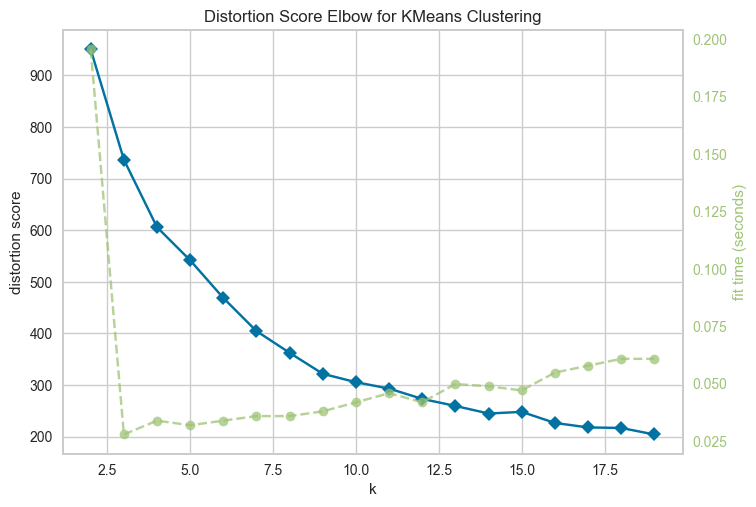

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(n_init=10, random_state=10)
visualizer = KElbowVisualizer(model, k=(2, 20), locate_elbow=False)
visualizer.fit(df)
visualizer.show()

Из графика видно, что с увеличением количества кластеров значение distortion score уменьшается, но после некоторого значения уменьшение замедляется (образуя "локоть" на графике). В данном случае можно заметить, что с увеличением количества кластеров с 2 до 8 значение distortion score значительно снижается, но затем уменьшение становится менее значительным. Таким образом, оптимальным количеством кластеров, исходя из анализа графика, можно считать 8. После этого значения уменьшение distortion score происходит уже не так существенно.

100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:01<00:00, 16.66it/s]


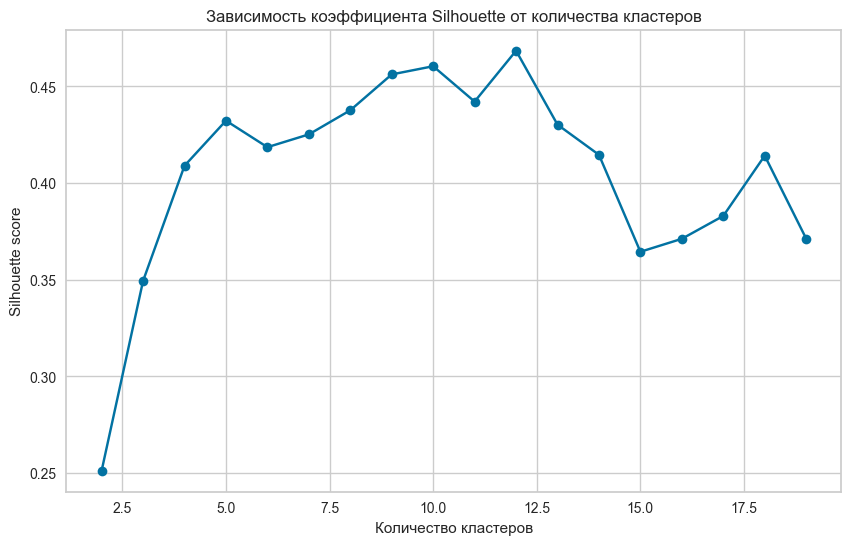

In [15]:
from sklearn.metrics import silhouette_score
from tqdm import tqdm

# Список для хранения коэффициентов Silhouette
silhouette_scores = []

# Диапазон количества кластеров для проверки
n_clusters_range = range(2, 20)

for n_clusters in tqdm(n_clusters_range):
    kmeans = KMeans(n_clusters=n_clusters, random_state=10, n_init=10)
    cluster_labels = kmeans.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Построение графика коэффициентов Silhouette для разных количеств кластеров
plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Silhouette score')
plt.title('Зависимость коэффициента Silhouette от количества кластеров')
plt.grid(True)
plt.show()

Из графика можно сделать вывод, что оптимальное число кластеров 12.

1.2 hierarhical.

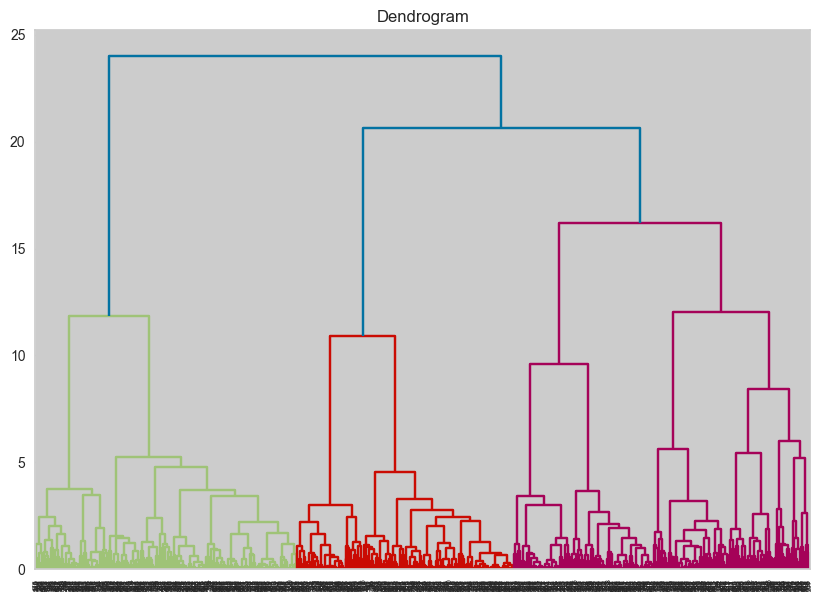

Для n_clusters = 2, средний silhouette_score = 0.25
Для n_clusters = 3, средний silhouette_score = 0.35
Для n_clusters = 4, средний silhouette_score = 0.41
Для n_clusters = 5, средний silhouette_score = 0.44
Для n_clusters = 6, средний silhouette_score = 0.42
Для n_clusters = 7, средний silhouette_score = 0.42
Для n_clusters = 8, средний silhouette_score = 0.44
Для n_clusters = 9, средний silhouette_score = 0.46
Для n_clusters = 10, средний silhouette_score = 0.47
Для n_clusters = 11, средний silhouette_score = 0.47
Для n_clusters = 12, средний silhouette_score = 0.47
Для n_clusters = 13, средний silhouette_score = 0.42
Для n_clusters = 14, средний silhouette_score = 0.43
Для n_clusters = 15, средний silhouette_score = 0.43
Для n_clusters = 16, средний silhouette_score = 0.40
Для n_clusters = 17, средний silhouette_score = 0.39
Для n_clusters = 18, средний silhouette_score = 0.38
Для n_clusters = 19, средний silhouette_score = 0.36


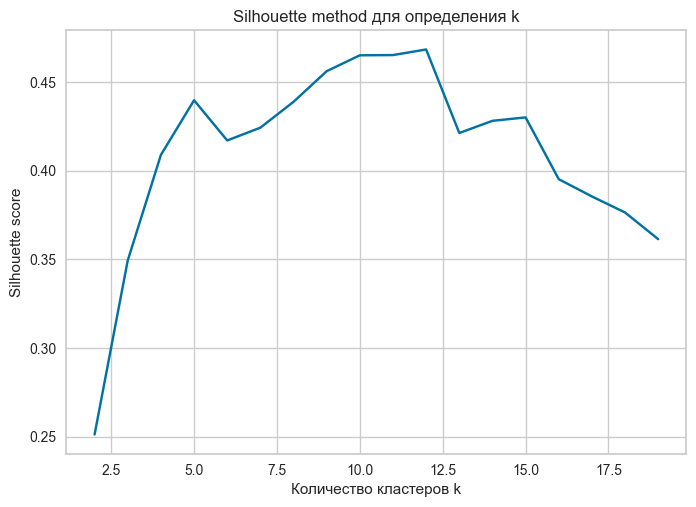

Оптимальное количество кластеров: 12


In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Сохраняем DataFrame в массив NumPy для дальнейшей работы
X = df.values

# Строим дендрограмму, чтобы визуально оценить количество кластеров
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = dendrogram(linkage(X, method='ward'))
plt.show()

# Далее используем Elbow Method и Silhouette score для определения оптимального числа кластеров
# Elbow Method может быть не так прямолинеен для иерархической кластеризации, как для k-means, но мы можем
# аппроксимировать его, оценивая изменения Silhouette score

silhouette_scores = []
range_n_clusters = list(range(2, 20))  # Примерный диапазон для числа кластеров

for n_clusters in range_n_clusters:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
    cluster_labels = clusterer.fit_predict(X)
    
    # Силуэтный коэффициент на текущем числе кластеров
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    print(f"Для n_clusters = {n_clusters}, средний silhouette_score = {silhouette_avg:.2f}")

# Визуализация silhouette scores для разного количества кластеров
plt.figure()
plt.plot(range_n_clusters, silhouette_scores, 'bx-')
plt.xlabel('Количество кластеров k')
plt.ylabel('Silhouette score')
plt.title('Silhouette method для определения k')
plt.show()

# Выберем количество кластеров с наивысшим Silhouette score
optimal_n_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f'Оптимальное количество кластеров: {optimal_n_clusters}')

Исходя из дендрограммы оптимальное количество кластеров 8.

1.3 DBSCAN.

In [17]:
from sklearn.cluster import DBSCAN

In [18]:
def dbscan_clustering(eps_range, X):
    eps_range = eps_range
    silhouette = []
    clusters = []
    for i in tqdm(eps_range):
        dbscan = DBSCAN(eps=i).fit(X)
        labels = dbscan.labels_
        uniq_labels = np.unique(labels)
        n_clusters = len(uniq_labels[uniq_labels != -1])
        if n_clusters > 1:
            score = silhouette_score(X, labels)
        else:
            score = 0
        silhouette.append(score)
        clusters.append(n_clusters)
        
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.plot(eps_range, silhouette, marker='o', color=color)
    ax1.set_xlabel('eps')
    ax1.set_ylabel('silhouette', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.plot(eps_range, clusters, marker='o', color=color)
    ax2.set_ylabel('n_clusters', color=color)  
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 21.51it/s]


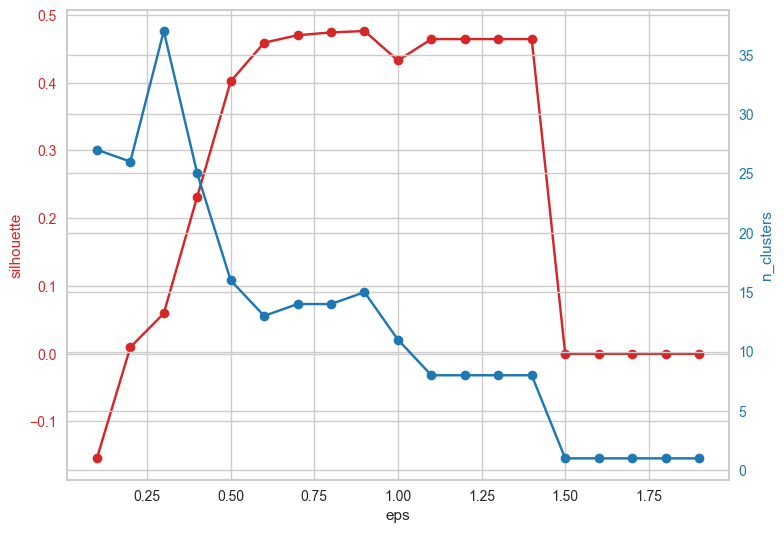

In [19]:
eps_range = np.arange(0.1,2,0.1)
# eps_range = np.arange(1.2,1.6,0.1)
dbscan_clustering(eps_range, X)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 17.25it/s]


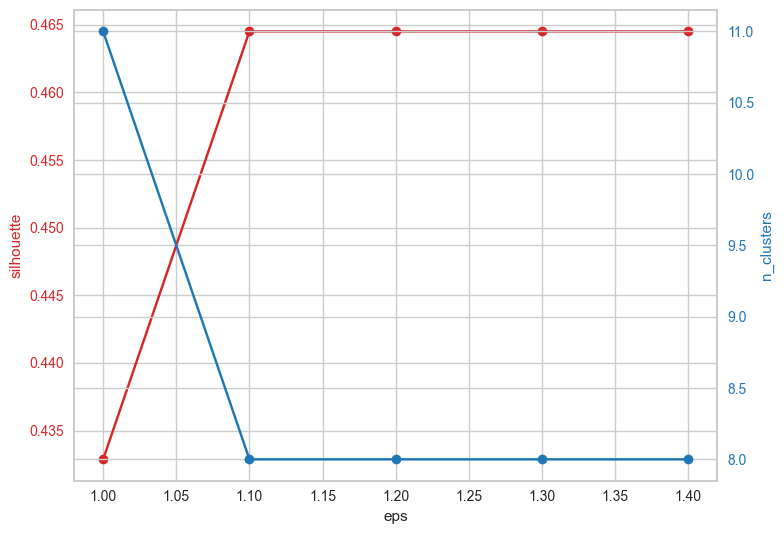

In [20]:
eps_range = np.arange(1.0,1.5,0.1)
dbscan_clustering(eps_range, X)

Исходя из графика можно сделать вывод, что оптимальное количество кластеров 8.

2. Также воспользуйтесь различными вариантами сжатия признакового пространства (PCA, UMAP, tSNE) и визуализируйте результаты кластеризации на двумерной плоскости.

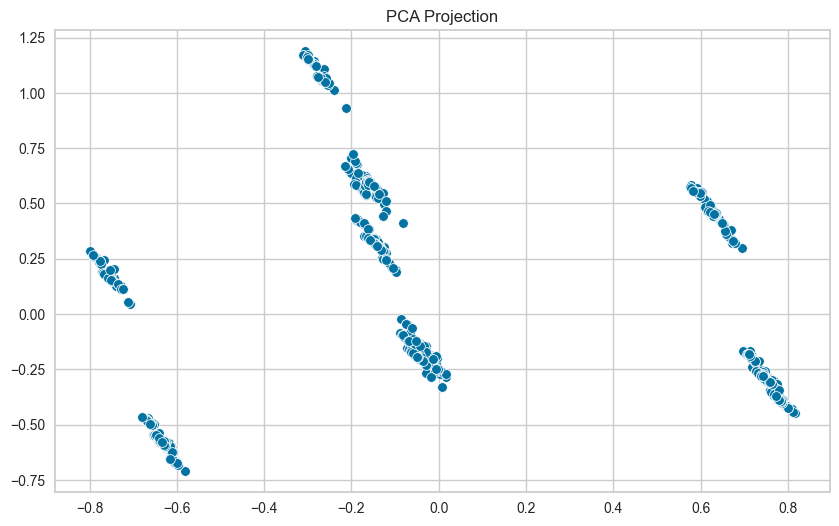

In [21]:
from sklearn.decomposition import PCA

# Применяем PCA к данным
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Визуализируем результаты PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1])
plt.title('PCA Projection')
plt.show()

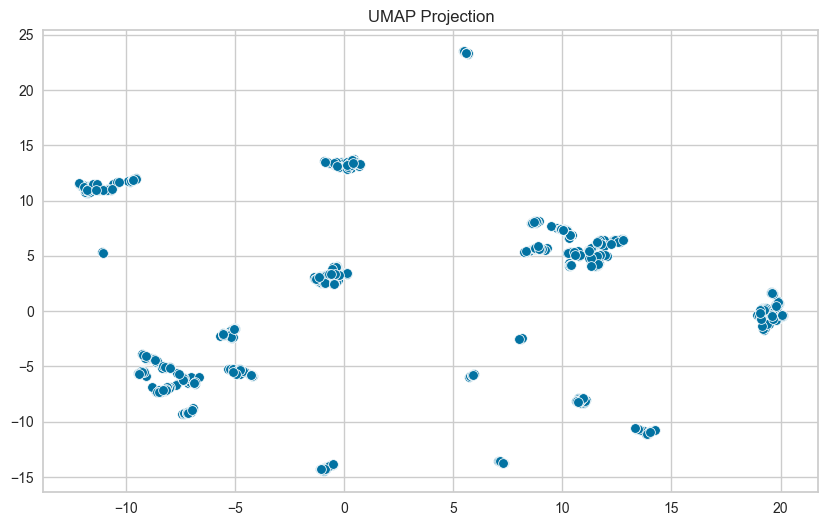

In [23]:
from umap import UMAP

# Применяем UMAP к данным
umap = UMAP(n_components=2, random_state=None)
X_umap = umap.fit_transform(X)

# Визуализируем результаты UMAP
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1])
plt.title('UMAP Projection')
plt.show()

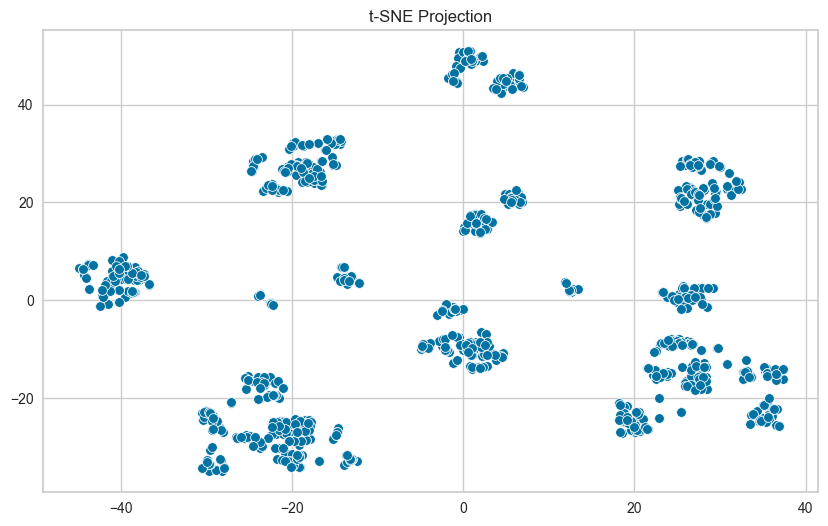

In [24]:
from sklearn.manifold import TSNE

# Применяем t-SNE к данным
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

# Визуализируем результаты t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1])
plt.title('t-SNE Projection')
plt.show()

# Часть 3. Интерпретация.

1. Теперь ваша задача - попытаться проинтерпретировать получившиеся кластеры, начните с простого расчета средних значений признаков для каждого из кластеров, есть ли интересные закономерности?

1.1 AgglomerativeClustering.

In [58]:
# После определения оптимального количества кластеров, выполняем Agglomerative Clustering с этим числом кластеров
clustering = AgglomerativeClustering(n_clusters=optimal_n_clusters, metric='euclidean', linkage='ward')

X_copy = X.copy()
clusters = clustering.fit_predict(X_copy)

# Создаем копию DataFrame df
df_clusters_ACluster = df.copy()

# Добавим метки кластеров в DataFrame
df_clusters_ACluster['Cluster'] = clusters
df_clusters_ACluster.head()

,Age,Sex,Job,Housing,Saving accounts,Duration,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Cluster
0,0.857143,1.0,0.666667,0.5,0.0,0.029412,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3
1,0.053571,0.0,0.666667,0.5,0.0,0.647059,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6
2,0.535714,1.0,0.333333,0.5,0.0,0.117647,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5
3,0.464286,1.0,0.666667,0.0,0.0,0.558824,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4
4,0.607143,1.0,0.666667,0.0,0.0,0.294118,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [59]:
# Обратное преобразование данных к исходному масштабу
df_clusters_ACluster[numeric_features] = scaler.inverse_transform(df_clusters_ACluster[numeric_features])
df_clusters_ACluster.head()

,Age,Sex,Job,Housing,Saving accounts,Duration,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Cluster
0,67.0,1.0,2.0,1.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3
1,22.0,0.0,2.0,1.0,0.0,48.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6
2,49.0,1.0,1.0,1.0,0.0,12.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5
3,45.0,1.0,2.0,0.0,0.0,42.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4
4,53.0,1.0,2.0,0.0,0.0,24.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [60]:
# Вычислим средние значения признаков для каждого кластера
cluster_means = df_clusters_ACluster.groupby('Cluster').mean()

# Выведем средние значения признаков для каждого кластера
cluster_means.T

Cluster,0,1,2,3,4,5,6,7,8,9,10,11
Age,38.465021,37.083333,33.712766,35.112821,34.757009,39.171429,33.752941,29.135135,36.500000,38.545455,31.315789,37.000000
Sex,1.000000,0.625000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.772727,0.000000,0.000000
Job,1.967078,2.125000,1.861702,1.907692,1.925234,1.885714,1.800000,1.918919,1.961538,1.500000,1.684211,1.791667
Housing,0.938272,0.916667,1.244681,1.051282,1.028037,0.828571,1.152941,1.459459,1.076923,0.954545,1.263158,1.041667
Saving accounts,0.333333,0.291667,0.510638,0.364103,0.355140,0.285714,0.341176,0.378378,0.474359,0.500000,0.315789,0.291667
Duration,21.090535,24.583333,20.095745,20.225641,20.261682,23.885714,19.635294,17.891892,26.923077,19.090909,27.000000,13.541667
Purpose_business,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
Purpose_car,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Purpose_domestic appliances,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Purpose_education,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


Исходя из полученных методом AgglomerativeClustering средних значений можно сделать вывод, что алгоритм выделил 12 групп лиц, отсортированных по полу и целям кредита. При этом Квалификация, Уровень дохода, Срок кредита сильно не отличаются.

|<b>Кластер</b>|<b>Пол</b>|<b>Средний возраст</b>|<b>Цель кредита</b>|
|:-:|:-:|:-:|:-:|
|0|Мужчины	|	39	|	Покупка автомобиля	|
|2|Женщины	|	34	|	Покупка автомобиля	|
|3|Мужчины	|	36	|	Радио/Телевизор	|
|6|Женщины	|	34	|	Радио/Телевизор	|
|4|Мужчины	|	35	|	Мебель/Оборудование	|
|7|Женщины	|	30	|	Мебель/Оборудование	|
|5|Мужчины	|	40	|	Образование	|
|11|Женщины	|	37	|	Образование	|
|8|Мужчины	|	37	|	Бизнес	|
|10|Женщины	|	32	|	Бизнес	|
|9|Мужчины и женщины	|	39	|	Ремонт	|
|1|Мужчины и женщины	|	38	|	Бытовая техника и другое	|

1.2 DBSCAN.

In [61]:
X_copy = X.copy()

# Создание экземпляра модели DBSCAN с выбранными параметрами
dbscan = DBSCAN(eps=1.1, min_samples=1)

# Создаем копию DataFrame df
df_clusters = df.copy()

# Обучение модели на данных
clusters_DBSCAN = dbscan.fit_predict(X_copy)

df_clusters['Cluster'] = clusters_DBSCAN
df_clusters.head()

,Age,Sex,Job,Housing,Saving accounts,Duration,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Cluster
0,0.857143,1.0,0.666667,0.5,0.0,0.029412,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0.053571,0.0,0.666667,0.5,0.0,0.647059,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,0.535714,1.0,0.333333,0.5,0.0,0.117647,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
3,0.464286,1.0,0.666667,0.0,0.0,0.558824,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
4,0.607143,1.0,0.666667,0.0,0.0,0.294118,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [62]:
# Обратное преобразование данных к исходному масштабу
df_clusters[numeric_features] = scaler.inverse_transform(df_clusters[numeric_features])
df_clusters.head()

,Age,Sex,Job,Housing,Saving accounts,Duration,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Cluster
0,67.0,1.0,2.0,1.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,22.0,0.0,2.0,1.0,0.0,48.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,49.0,1.0,1.0,1.0,0.0,12.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
3,45.0,1.0,2.0,0.0,0.0,42.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
4,53.0,1.0,2.0,0.0,0.0,24.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [63]:
# Вычислим средние значения признаков для каждого кластера
cluster_means = df_clusters.groupby('Cluster').mean()

# Выведем средние значения признаков для каждого кластера
cluster_means.T

Cluster,0,1,2,3,4,5,6,7
Age,34.700000,38.288136,32.458564,37.139466,35.484536,34.250000,38.545455,39.916667
Sex,0.696429,0.593220,0.591160,0.721068,0.804124,0.500000,0.772727,0.750000
Job,1.875000,1.847458,1.922652,1.937685,1.907216,1.750000,1.500000,2.500000
Housing,1.082143,0.915254,1.204420,1.023739,1.113402,1.166667,0.954545,0.666667
Saving accounts,0.357143,0.288136,0.364641,0.382789,0.443299,0.416667,0.500000,0.166667
Duration,20.046429,19.677966,19.292818,20.813056,26.938144,16.833333,19.090909,32.333333
Purpose_business,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
Purpose_car,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
Purpose_domestic appliances,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
Purpose_education,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


1.3 OPTICS.

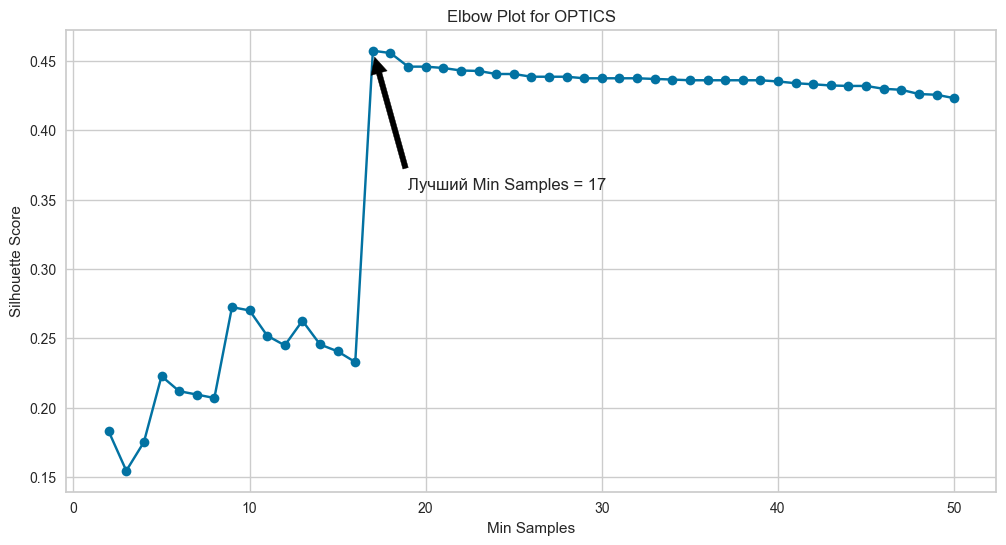

In [64]:
from sklearn.cluster import OPTICS
import hdbscan

# Обучение OPTICS
clustering = OPTICS(min_samples=50).fit(X)

# Инициализация переменных для хранения результатов
best_min_samples = None
best_silhouette_score = -np.inf

# Elbow method для определения лучшего min_samples
silhouette_scores = []
for min_samples in range(2, 51):
    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_samples)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    # Проверка, является ли текущее значение лучшим
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_min_samples = min_samples

# Отрисовка Elbow plot
plt.figure(figsize=(12, 6))
plt.plot(range(2, 51), silhouette_scores, marker='o')
plt.xlabel('Min Samples')
plt.ylabel('Silhouette Score')
plt.title('Elbow Plot for OPTICS')
plt.annotate(f'Лучший Min Samples = {best_min_samples}', 
             xy=(best_min_samples, best_silhouette_score), 
             xytext=(best_min_samples + 2, best_silhouette_score - 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

In [65]:
X_copy = X.copy()

# Создание экземпляра модели OPTICS с выбранными параметрами
optics = OPTICS(min_samples=17, xi=0.05, min_cluster_size=12)

# Создаем копию DataFrame df
df_clusters = df.copy()

# Обучение модели на данных
clusters = optics.fit_predict(X_copy)

df_clusters['Cluster'] = clusters_DBSCAN
df_clusters.head()

,Age,Sex,Job,Housing,Saving accounts,Duration,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Cluster
0,0.857143,1.0,0.666667,0.5,0.0,0.029412,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0.053571,0.0,0.666667,0.5,0.0,0.647059,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,0.535714,1.0,0.333333,0.5,0.0,0.117647,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
3,0.464286,1.0,0.666667,0.0,0.0,0.558824,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
4,0.607143,1.0,0.666667,0.0,0.0,0.294118,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [66]:
# Обратное преобразование данных к исходному масштабу
df_clusters[numeric_features] = scaler.inverse_transform(df_clusters[numeric_features])
df_clusters.head()

,Age,Sex,Job,Housing,Saving accounts,Duration,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Cluster
0,67.0,1.0,2.0,1.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,22.0,0.0,2.0,1.0,0.0,48.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,49.0,1.0,1.0,1.0,0.0,12.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
3,45.0,1.0,2.0,0.0,0.0,42.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
4,53.0,1.0,2.0,0.0,0.0,24.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [67]:
# Вычислим средние значения признаков для каждого кластера
cluster_means = df_clusters.groupby('Cluster').mean()

# Выведем средние значения признаков для каждого кластера
cluster_means.T

Cluster,0,1,2,3,4,5,6,7
Age,34.700000,38.288136,32.458564,37.139466,35.484536,34.250000,38.545455,39.916667
Sex,0.696429,0.593220,0.591160,0.721068,0.804124,0.500000,0.772727,0.750000
Job,1.875000,1.847458,1.922652,1.937685,1.907216,1.750000,1.500000,2.500000
Housing,1.082143,0.915254,1.204420,1.023739,1.113402,1.166667,0.954545,0.666667
Saving accounts,0.357143,0.288136,0.364641,0.382789,0.443299,0.416667,0.500000,0.166667
Duration,20.046429,19.677966,19.292818,20.813056,26.938144,16.833333,19.090909,32.333333
Purpose_business,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
Purpose_car,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
Purpose_domestic appliances,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
Purpose_education,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Исходя из полученных методами DBSCAN и OPTICS средних значений можно сделать вывод, что сортировка прошла исключительно по целям кредита.

2. Теперь постройте boxplot-ы для каждого признака, сгруппировав значения по кластерам, по каким признакам заметно наибольшее отличие кластеров друг от друга? Можно ли их интерпретировать?

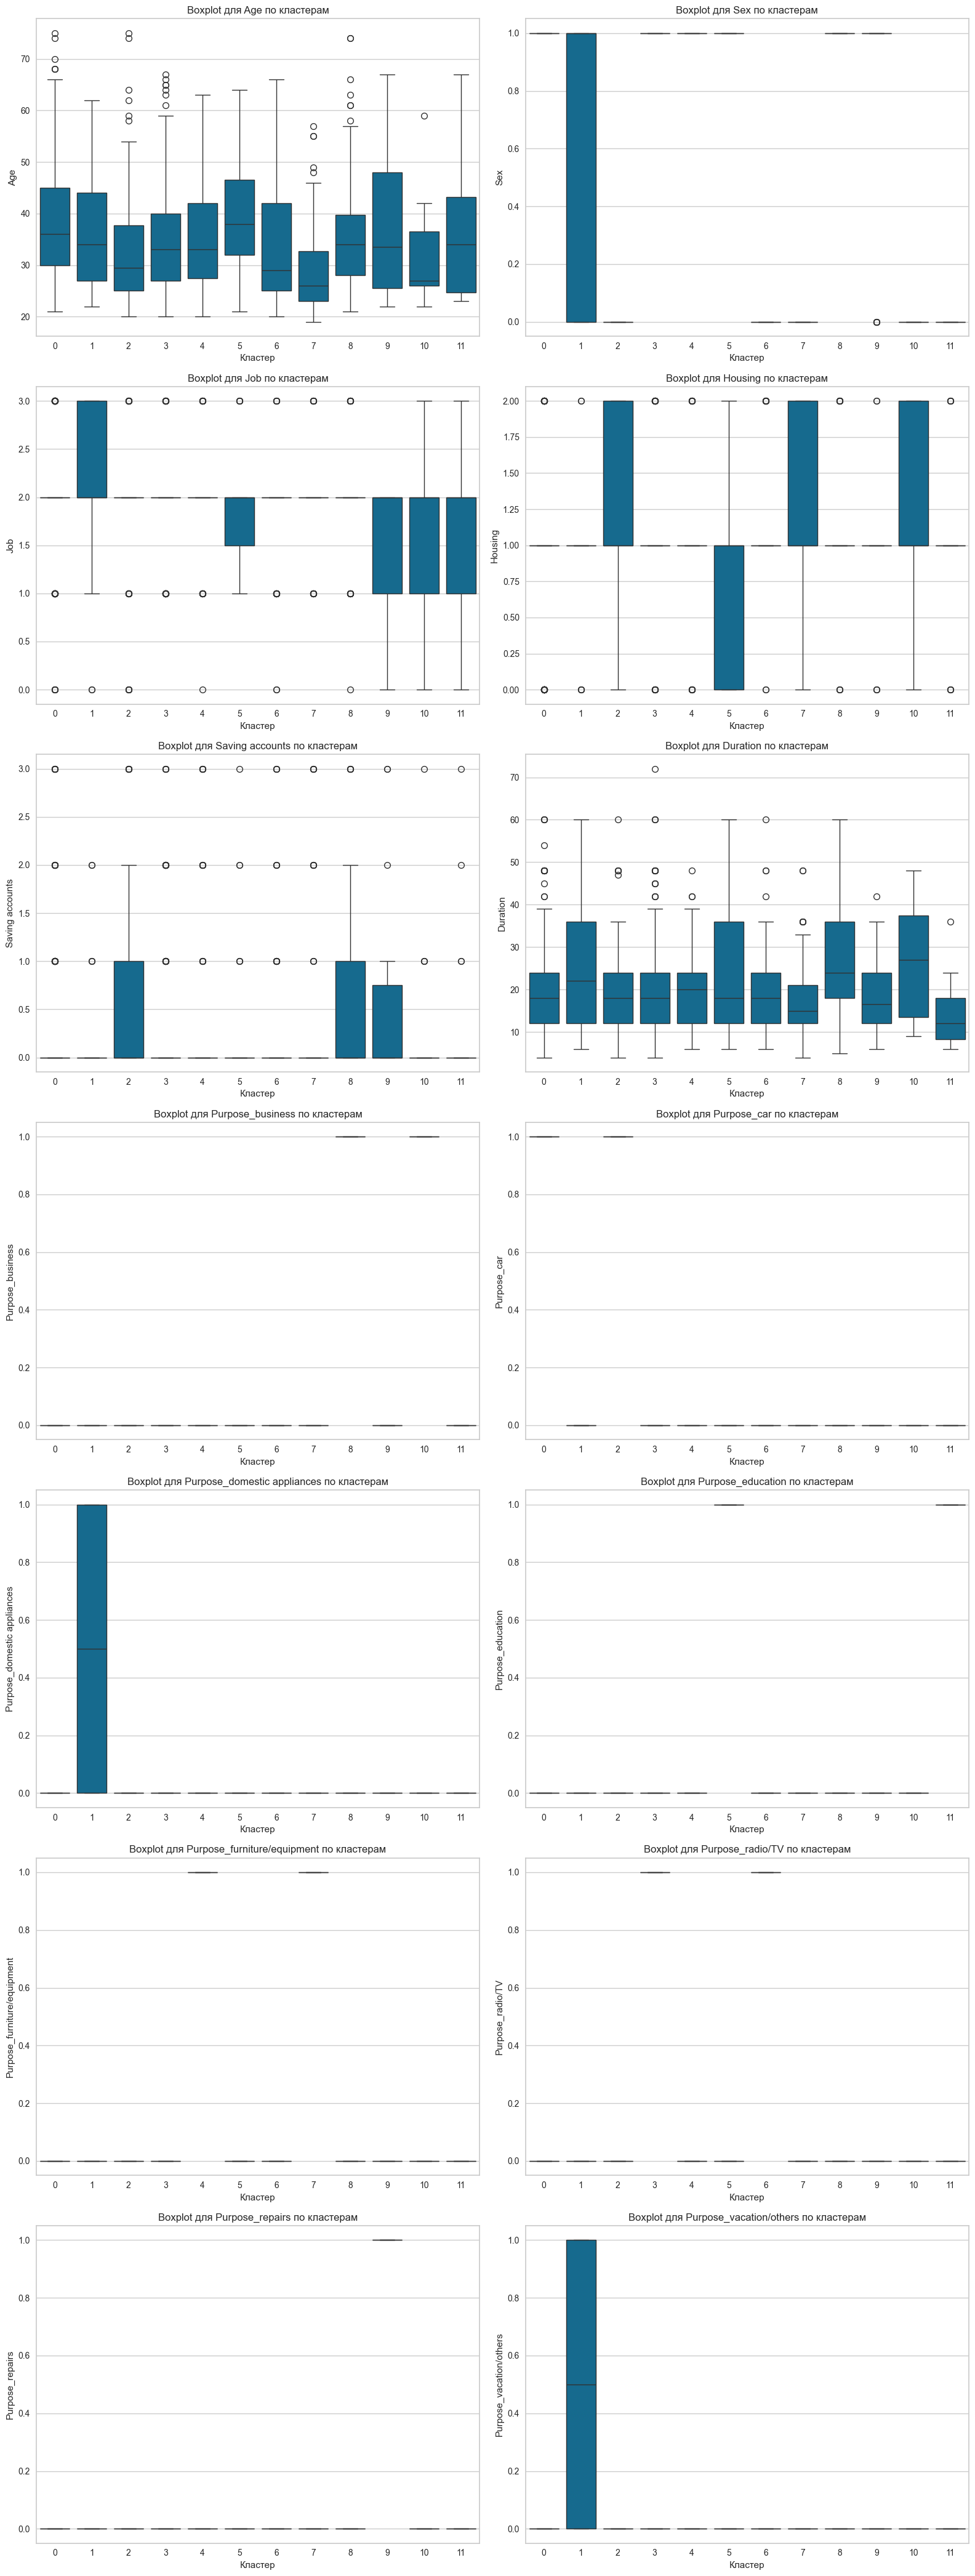

In [68]:
# Параметры для размещения графиков
n_rows = int(np.ceil(len(numeric_features) / 2))  # Определяем количество строк
n_cols = 2  # Определяем количество столбцов

fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, 6*n_rows))  # Создаем область для графиков

# Построение boxplot-ов для каждого признака, сгруппированных по кластерам
for i, feature in enumerate(numeric_features):  
    row = i // n_cols
    col = i % n_cols
    ax = axs[row, col] if n_rows > 1 else axs[col]
    
    sns.boxplot(x='Cluster', y=feature, data=df_clusters_ACluster, ax=ax)
    ax.set_title(f'Boxplot для {feature} по кластерам')
    ax.set_xlabel('Кластер')
    ax.set_ylabel(feature)

# Убираем пустой график в случае необходимости
if len(numeric_features) < n_rows * n_cols:
    axs[-1, -1].axis('off')

plt.tight_layout()
plt.show()

Наибольшее отличие кластеров друг от друга получилось для признаков "Sex" и Целей кредитов.